In [26]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit
from qiskit import Aer, execute
from qiskit.quantum_info import state_fidelity

qasm_backend = Aer.get_backend('qasm_simulator')

In [636]:
from qiskit.quantum_info import DensityMatrix, Statevector, partial_trace

def getDensityMatrix(circuit):
    return DensityMatrix(circuit).data

def getStatevector(circuit):
    return Statevector(circuit).data

In [9]:
import warnings
warnings.filterwarnings('ignore')

# 1. Extimating experssibility

## 1.1 tool functions

In [504]:
def P_haar(N, F):
    if F == 1:
        return 0
    return (N - 1) * ((1 - F) ** (N - 2))

In [434]:
def Ft(N, t):
    f = np.math.factorial
    return f(t) * f(N-1) / f(t + N - 1)

In [416]:
def KL(P, Q):
    epsilon = 1e-8
    kl_divergence = 0.0
    
    for p, q in zip(P, Q):
        kl_divergence += p * np.log( (p + epsilon) / (q + epsilon) )
    
    return abs(kl_divergence)

## 1.2 Examples

### 1.2.1 circuit idle

In [276]:
circuit_idle = QuantumCircuit(1)
circuit_idle.i(0)

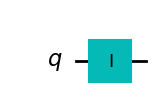

In [277]:
circuit_idle.draw(output='mpl')

In [278]:
state_fidelity(getStatevector(circuit_idle), getStatevector(circuit_idle))

1.0

In [279]:
P_haar(2, 1.0)

0

In [417]:
pPQC = np.array([0] * 75)
pPQC[74] = 1
pHaar = np.array([1/75] * 75)

In [418]:
KL(pPQC, pHaar)

4.317487373536592

### 1.2.2 circuit A

In [331]:
def sampleCircuitA():
    circuit_A = QuantumCircuit(1)
    circuit_A.h(0)
    circuit_A.rz(np.random.uniform(0, 2 * np.pi), 0)
    
    return circuit_A

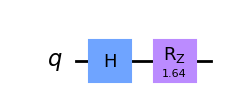

In [332]:
circuit_A_example1 = sampleCircuitA()
circuit_A_example1.draw(output='mpl')

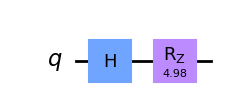

In [333]:
circuit_A_example2 = sampleCircuitA()
circuit_A_example2.draw(output='mpl')

In [334]:
state_fidelity(
    getStatevector(circuit_A_example1),
    getStatevector(circuit_A_example2)
)

0.009839055699261787

In [419]:
unit = 1/75
limits = []
probabilities = np.array([0] * 75)
for i in range(1, 76):
    limits.append(unit * i)
    
for i in range(1000):
    circuit_1 = sampleCircuitA()
    circuit_2 = sampleCircuitA()
    f = state_fidelity(
        getStatevector(circuit_1),
        getStatevector(circuit_2)
    )
    
    for j in range(75):
        if f <= limits[j]:
            probabilities[j] += 1
            break

In [420]:
probabilities = [ p / 1000 for p in probabilities ]

In [421]:
pHaar = np.array([1/75] * 75)
KL(probabilities, pHaar)

0.2140082099427037

### 1.2.3 circuit B

In [379]:
def sampleCircuitB():
    circuit_B = QuantumCircuit(1)
    circuit_B.h(0)
    circuit_B.rz(np.random.uniform(0, 2 * np.pi), 0)
    circuit_B.rx(np.random.uniform(0, 2 * np.pi), 0)
    
    return circuit_B

In [425]:
unit = 1/75
limits = []
probabilities = np.array([0] * 75)
for i in range(1, 76):
    limits.append(unit * i)
    
for i in range(1000):
    circuit_1 = sampleCircuitB()
    circuit_2 = sampleCircuitB()
    f = state_fidelity(
        getStatevector(circuit_1),
        getStatevector(circuit_2)
    )
    
    for j in range(75):
        if f <= limits[j]:
            probabilities[j] += 1
            break

In [426]:
probabilities = [ p / 1000 for p in probabilities ]

In [427]:
pHaar = np.array([1/75] * 75)
KL(probabilities, pHaar)

0.044405881846006474

### 1.2.4 VQC Circuit type 3

In [573]:
def sampleVQCCircuit3():
    circuit_vqc = QuantumCircuit(4)
    circuit_vqc.rx(np.random.uniform(0, 2 * np.pi), 0)
    circuit_vqc.rx(np.random.uniform(0, 2 * np.pi), 1)
    circuit_vqc.rx(np.random.uniform(0, 2 * np.pi), 2)
    circuit_vqc.rx(np.random.uniform(0, 2 * np.pi), 3)
    
    circuit_vqc.rz(np.random.uniform(0, 2 * np.pi), 0)
    circuit_vqc.rz(np.random.uniform(0, 2 * np.pi), 1)
    circuit_vqc.rz(np.random.uniform(0, 2 * np.pi), 2)
    circuit_vqc.rz(np.random.uniform(0, 2 * np.pi), 3)
    
    circuit_vqc.crz(np.random.uniform(0, 2 * np.pi), 3, 2)
    circuit_vqc.crz(np.random.uniform(0, 2 * np.pi), 2, 1)
    circuit_vqc.crz(np.random.uniform(0, 2 * np.pi), 1, 0)
    
    return circuit_vqc

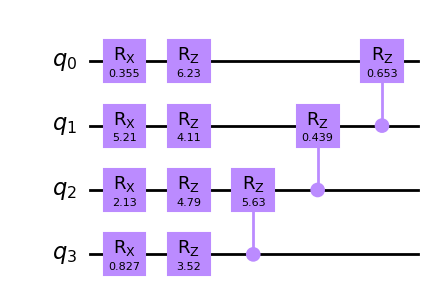

In [574]:
circuit_vqc_example = sampleVQCCircuit3()
circuit_vqc_example.draw(output='mpl')

In [670]:
unit = 1/75
limits = []
probabilities = np.array([0] * 75)
for i in range(1, 76):
    limits.append(unit * i)
    
for i in range(2500):
    circuit_1 = sampleVQCCircuit3()
    circuit_2 = sampleVQCCircuit3()
    f = state_fidelity(
        getStatevector(circuit_1),
        getStatevector(circuit_2)
    )
    
    for j in range(75):
        if f <= limits[j]:
            probabilities[j] += 1
            break

In [671]:
pHaar_vqc = [ P_haar(2 ** 4, f - (unit/2)) / 75 for f in limits]

In [672]:
probabilities = [ p / 2500 for p in probabilities ]

In [673]:
KL(probabilities, pHaar_vqc)

0.2345793665330672

### 1.2.5 VQC circuit type 6

In [606]:
def sampleVQCCircuit6():
    circuit_vqc = QuantumCircuit(4)
    circuit_vqc.rx(np.random.uniform(0, 2 * np.pi), 0)
    circuit_vqc.rx(np.random.uniform(0, 2 * np.pi), 1)
    circuit_vqc.rx(np.random.uniform(0, 2 * np.pi), 2)
    circuit_vqc.rx(np.random.uniform(0, 2 * np.pi), 3)
    
    circuit_vqc.rz(np.random.uniform(0, 2 * np.pi), 0)
    circuit_vqc.rz(np.random.uniform(0, 2 * np.pi), 1)
    circuit_vqc.rz(np.random.uniform(0, 2 * np.pi), 2)
    circuit_vqc.rz(np.random.uniform(0, 2 * np.pi), 3)
    
    circuit_vqc.crx(np.random.uniform(0, 2 * np.pi), 3, 2)
    circuit_vqc.crx(np.random.uniform(0, 2 * np.pi), 3, 1)
    circuit_vqc.crx(np.random.uniform(0, 2 * np.pi), 3, 0)
    
    circuit_vqc.crx(np.random.uniform(0, 2 * np.pi), 2, 3)
    circuit_vqc.crx(np.random.uniform(0, 2 * np.pi), 2, 1)
    circuit_vqc.crx(np.random.uniform(0, 2 * np.pi), 2, 0)
    
    circuit_vqc.crx(np.random.uniform(0, 2 * np.pi), 1, 3)
    circuit_vqc.crx(np.random.uniform(0, 2 * np.pi), 1, 2)
    circuit_vqc.crx(np.random.uniform(0, 2 * np.pi), 1, 0)
    
    circuit_vqc.crx(np.random.uniform(0, 2 * np.pi), 0, 3)
    circuit_vqc.crx(np.random.uniform(0, 2 * np.pi), 0, 2)
    circuit_vqc.crx(np.random.uniform(0, 2 * np.pi), 0, 1)
    
    circuit_vqc.rx(np.random.uniform(0, 2 * np.pi), 0)
    circuit_vqc.rx(np.random.uniform(0, 2 * np.pi), 1)
    circuit_vqc.rx(np.random.uniform(0, 2 * np.pi), 2)
    circuit_vqc.rx(np.random.uniform(0, 2 * np.pi), 3)
    
    circuit_vqc.rz(np.random.uniform(0, 2 * np.pi), 0)
    circuit_vqc.rz(np.random.uniform(0, 2 * np.pi), 1)
    circuit_vqc.rz(np.random.uniform(0, 2 * np.pi), 2)
    circuit_vqc.rz(np.random.uniform(0, 2 * np.pi), 3)
    
    return circuit_vqc

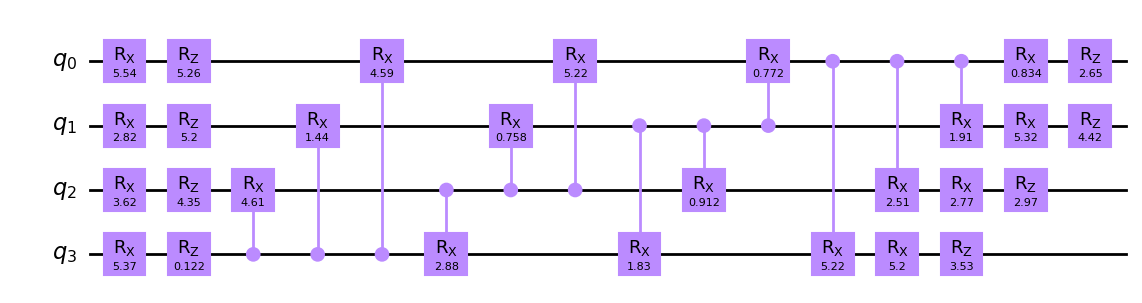

In [628]:
circuit_vqc_example = sampleVQCCircuit6()
circuit_vqc_example.draw(output='mpl')

In [674]:
unit = 1/75
limits = []
probabilities = np.array([0] * 75)
for i in range(1, 76):
    limits.append(unit * i)
    
for i in range(2500):
    circuit_1 = sampleVQCCircuit6().compose(sampleVQCCircuit6())
    circuit_2 = sampleVQCCircuit6().compose(sampleVQCCircuit6())
    f = state_fidelity(
        getStatevector(circuit_1),
        getStatevector(circuit_2)
    )
    
    for j in range(75):
        if f <= limits[j]:
            probabilities[j] += 1
            break

In [675]:
pHaar_vqc = [ P_haar(2 ** 4, f - (unit/2)) / 75 for f in limits]

In [676]:
probabilities = [ p / 2500 for p in probabilities ]

In [677]:
KL(probabilities, pHaar_vqc)

0.011677241272621668

### 1.2.5 VQC circuit type 4

In [687]:
def sampleVQCCircuit4():
    circuit_vqc = QuantumCircuit(4)
    circuit_vqc.rx(np.random.uniform(0, 2 * np.pi), 0)
    circuit_vqc.rx(np.random.uniform(0, 2 * np.pi), 1)
    circuit_vqc.rx(np.random.uniform(0, 2 * np.pi), 2)
    circuit_vqc.rx(np.random.uniform(0, 2 * np.pi), 3)
    
    circuit_vqc.rz(np.random.uniform(0, 2 * np.pi), 0)
    circuit_vqc.rz(np.random.uniform(0, 2 * np.pi), 1)
    circuit_vqc.rz(np.random.uniform(0, 2 * np.pi), 2)
    circuit_vqc.rz(np.random.uniform(0, 2 * np.pi), 3)
    
    circuit_vqc.crx(np.random.uniform(0, 2 * np.pi), 3, 2)
    circuit_vqc.crx(np.random.uniform(0, 2 * np.pi), 2, 1)
    circuit_vqc.crx(np.random.uniform(0, 2 * np.pi), 1, 0)
    
    return circuit_vqc

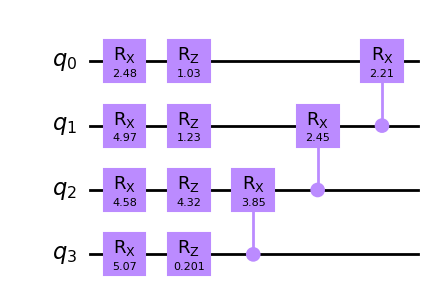

In [689]:
circuit_vqc_example = sampleVQCCircuit4()
circuit_vqc_example.draw(output='mpl')

In [688]:
unit = 1/75
limits = []
probabilities = np.array([0] * 75)
for i in range(1, 76):
    limits.append(unit * i)
    
for i in range(2500):
    circuit_1 = sampleVQCCircuit4()
    circuit_2 = sampleVQCCircuit4()
    f = state_fidelity(
        getStatevector(circuit_1),
        getStatevector(circuit_2)
    )
    
    for j in range(75):
        if f <= limits[j]:
            probabilities[j] += 1
            break

In [690]:
pHaar_vqc = [ P_haar(2 ** 4, f - (unit/2)) / 75 for f in limits]

In [691]:
probabilities = [ p / 2500 for p in probabilities ]

In [692]:
KL(probabilities, pHaar_vqc)

0.1285636391283769

# 2. Entanglement capability

## 2.1 VQC circuit type 3

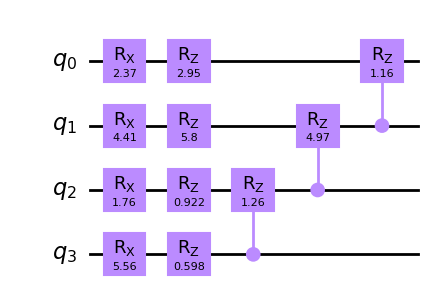

In [648]:
circuit_vqc3 = sampleVQCCircuit3()
circuit_vqc3.draw(output='mpl')

In [649]:
matrix = getDensityMatrix(circuit_vqc3)

In [650]:
partial_trace(matrix, [1, 2, 3])

DensityMatrix([[ 0.14134592+5.42101086e-18j, -0.16306779-2.48105477e-01j],
               [-0.16306779+2.48105477e-01j,  0.85865408-5.20417043e-18j]],
              dims=(2,))


In [651]:
rou0 = partial_trace(matrix, [1, 2, 3])
rou1 = partial_trace(matrix, [0, 2, 3])
rou2 = partial_trace(matrix, [0, 1, 3])
rou3 = partial_trace(matrix, [0, 1, 2])

In [652]:
tr0 = np.trace(rou0.data @ rou0.data)
tr1 = np.trace(rou1.data @ rou1.data)
tr2 = np.trace(rou2.data @ rou2.data)
tr3 = np.trace(rou3.data @ rou3.data)

In [653]:
tr = tr0 + tr1 + tr2 + tr3
np.abs(tr)

3.445655127812972

In [654]:
np.abs(tr) / 4

0.861413781953243

In [655]:
1 - np.abs(tr) / 4

0.13858621804675697

In [656]:
2 * (1 - np.abs(tr) / 4)

0.27717243609351394

In [683]:
def Q(circuit):
    matrix = getDensityMatrix(circuit)
    
    rou0 = partial_trace(matrix, [1, 2, 3])
    rou1 = partial_trace(matrix, [0, 2, 3])
    rou2 = partial_trace(matrix, [0, 1, 3])
    rou3 = partial_trace(matrix, [0, 1, 2])
    
    tr0 = np.trace(rou0.data @ rou0.data)
    tr1 = np.trace(rou1.data @ rou1.data)
    tr2 = np.trace(rou2.data @ rou2.data)
    tr3 = np.trace(rou3.data @ rou3.data)
    
    tr = tr0 + tr1 + tr2 + tr3
    
    return 2 * (1 - np.abs(tr) / 4)

In [679]:
Q3(circuit_vqc3)

0.27717243609351394

In [684]:
def Ent(sampler):
    ent = 0
    for i in range(5000):
        ent += Q(sampler())
    return ent / 5000

In [685]:
Ent(sampleVQCCircuit3)

0.16736949937979317

In [686]:
Ent(sampleVQCCircuit6)

0.6872311429193363

In [693]:
Ent(sampleVQCCircuit4)

0.31307926397581776